In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.version

In [3]:
import model
import train
import utilities

In [4]:
import ast
import os

from collections import Counter, defaultdict

In [5]:
data = utilities.read_all_gcj()

../CodeStylometry/Corpus/temp/codejamfolder/py/ipknHama0/p24481.ipknHama0.py
'utf-8' codec can't decode byte 0xb9 in position 77: invalid start byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1485488.RedApe0.py
'utf-8' codec can't decode byte 0xea in position 1289: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1590487.RedApe0.py
'utf-8' codec can't decode byte 0xef in position 3183: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1080487.RedApe0.py
'utf-8' codec can't decode byte 0xf2 in position 1158: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1481486.RedApe0.py
'utf-8' codec can't decode byte 0xee in position 1204: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/RedApe0/p1480487.RedApe0.py
'utf-8' codec can't decode byte 0xe3 in position 1306: invalid continuation byte
../CodeStylometry/Corpus/temp/codejamfolder/py/seiya0/p2449486.seiya0.p

In [6]:
data = utilities.filter_by_count(data, 35, 70)

In [7]:
print(sorted(data.keys()))

['ali.assaf0', 'bigOnion0', 'd.operator0', 'damo.yu0', 'dennis.lissov0', 'mth0', 'pawko0']


In [8]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.8)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [9]:
batch_sampler.classes

['ali.assaf0',
 'bigOnion0',
 'd.operator0',
 'damo.yu0',
 'dennis.lissov0',
 'mth0',
 'pawko0']

In [10]:
batch_sampler.get_n_classes()

7

In [11]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([37, 33, 28, 30, 34, 31, 32]))

In [12]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([10,  9,  7,  8,  9,  8,  8]))

In [20]:
model_params = {
    "n_classes":batch_sampler.get_n_classes(),
    "encoder_params": {
        "embedding_dims":100,
        "combiner_dims":100,
        "name_embedding_dims":100,
        "dropout":0.2,
        "num_layers":1, "rnn_dropout":0.0,
        "most_common_names_file":"most_common_names.pkl",
        "OOV_ID":0
        
    },
    'reqularizer_alpha':0.001
}

In [21]:
track_metric = {
    "metric_name":"accuracy",
    "function":train.validate_max
}

In [43]:
cls = model.NameModel(model_params)

In [47]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()), track_metric, "new_debug-GCJ-names-7_classes")

In [51]:
torch.set_num_threads(1)

In [52]:
# trainer.train_metrics['grads_embeddings']

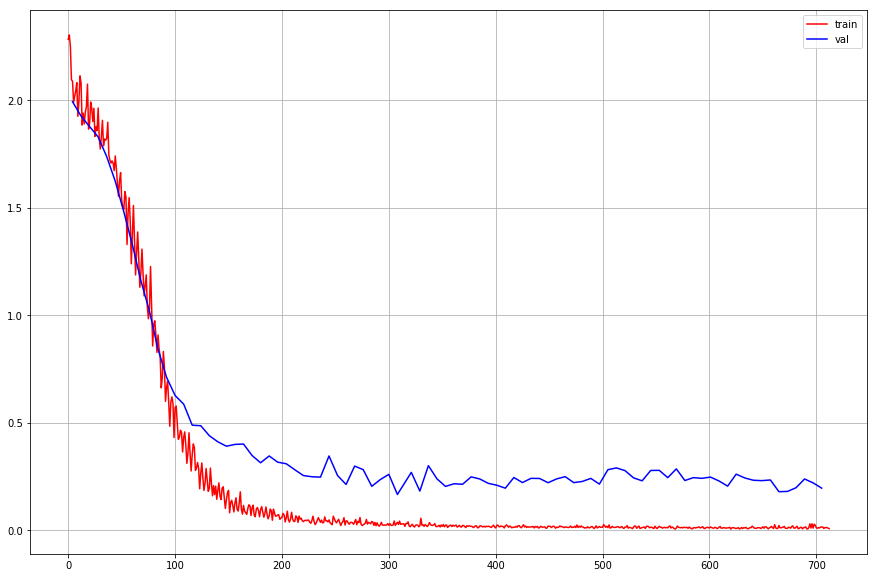

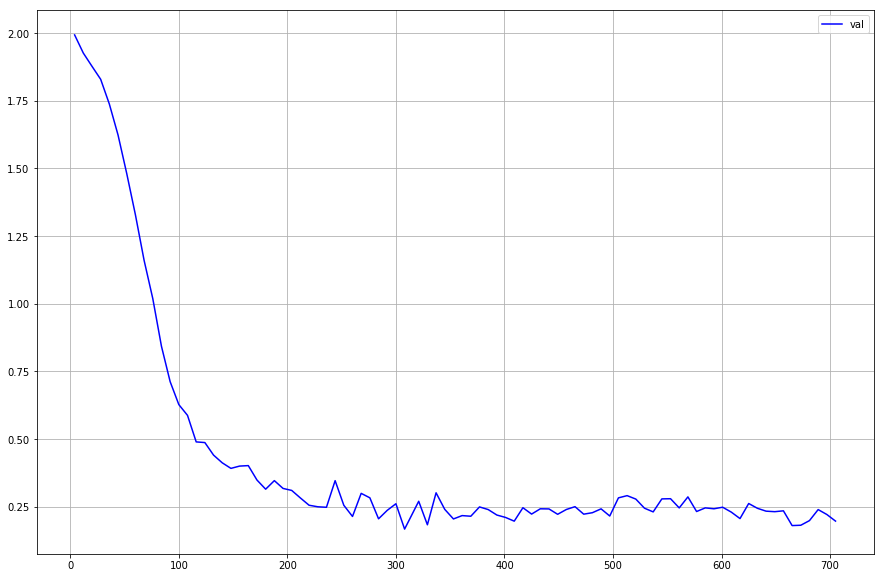

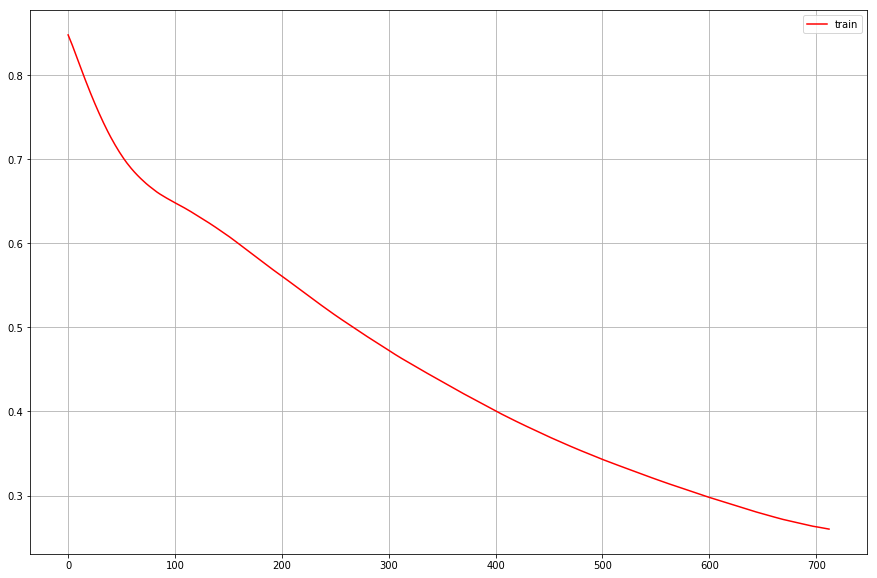

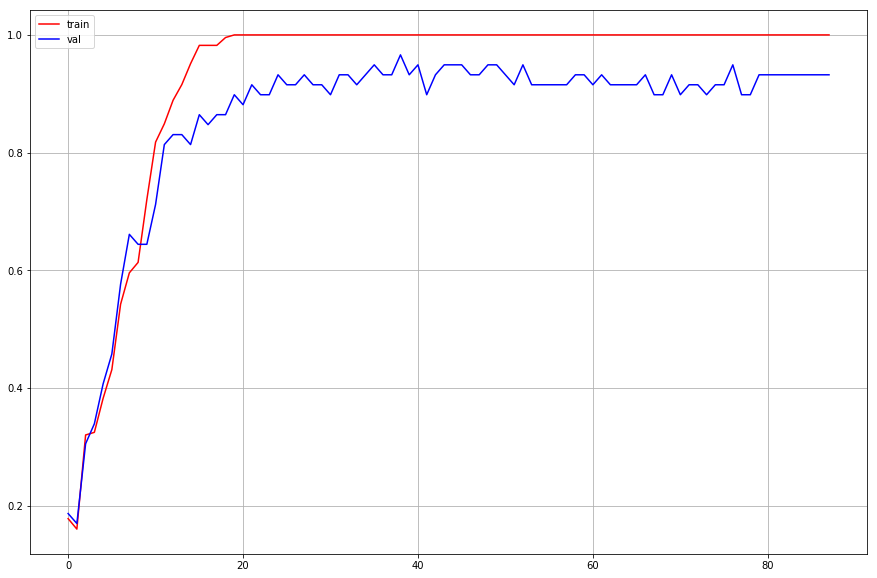

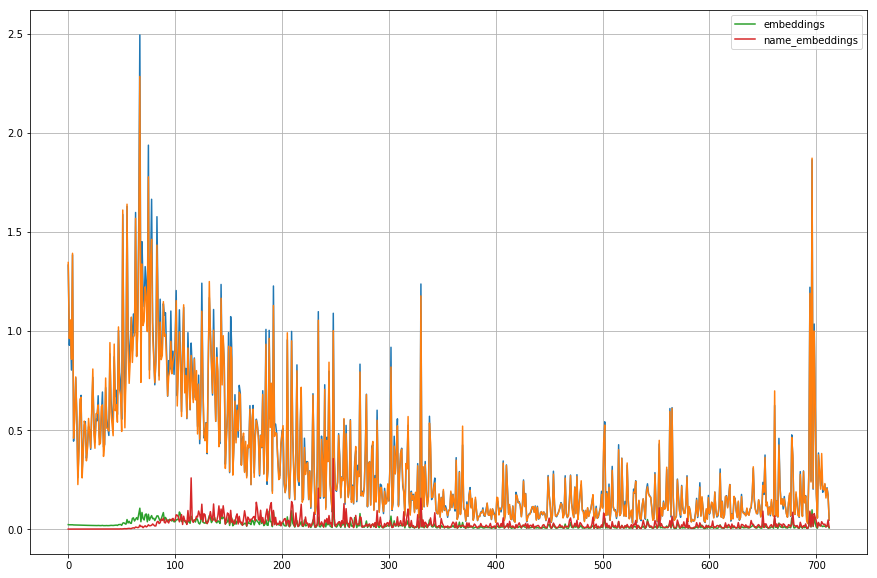

In [53]:
trainer.train(batch_sampler, {"n_epochs":100, "validate_every":2})

In [54]:
import gc
gc.collect()

0

Accuracy =  1.0


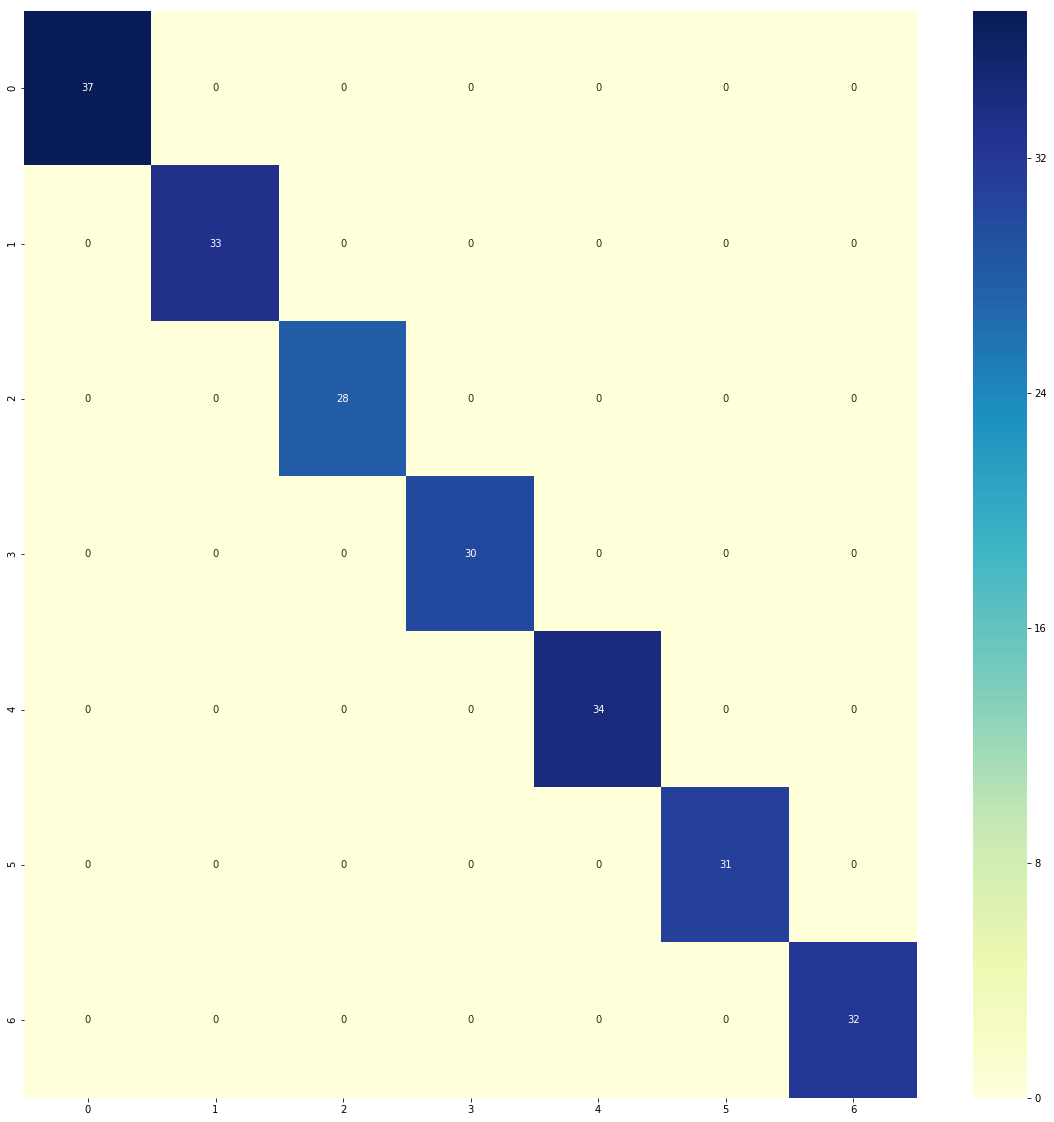

In [59]:
utilities.print_confusion_matrix(cls, batch_sampler.x_train, batch_sampler.y_train)

Accuracy =  0.9322033898305084


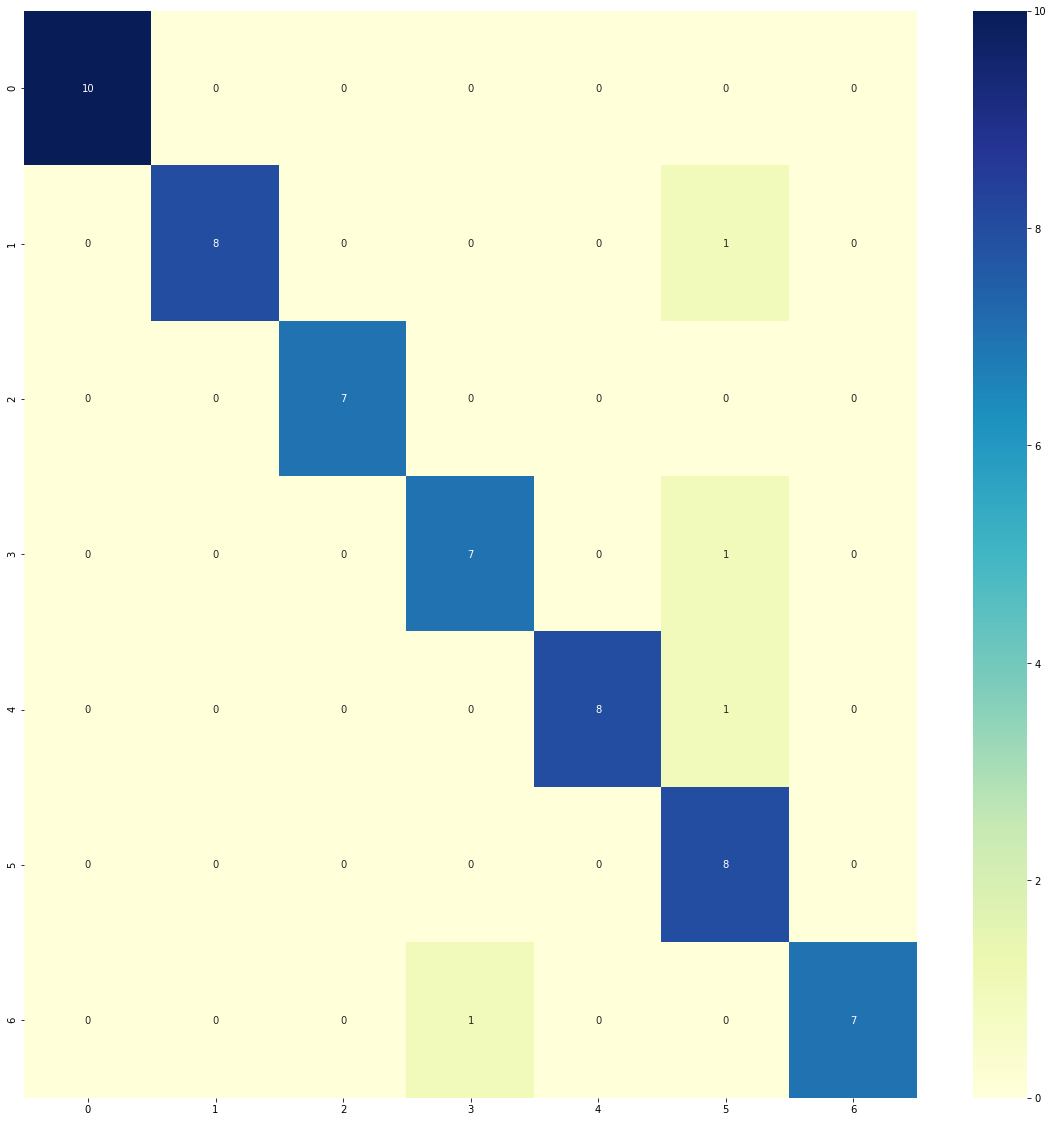

In [60]:
utilities.print_confusion_matrix(cls, batch_sampler.x_test, batch_sampler.y_test)

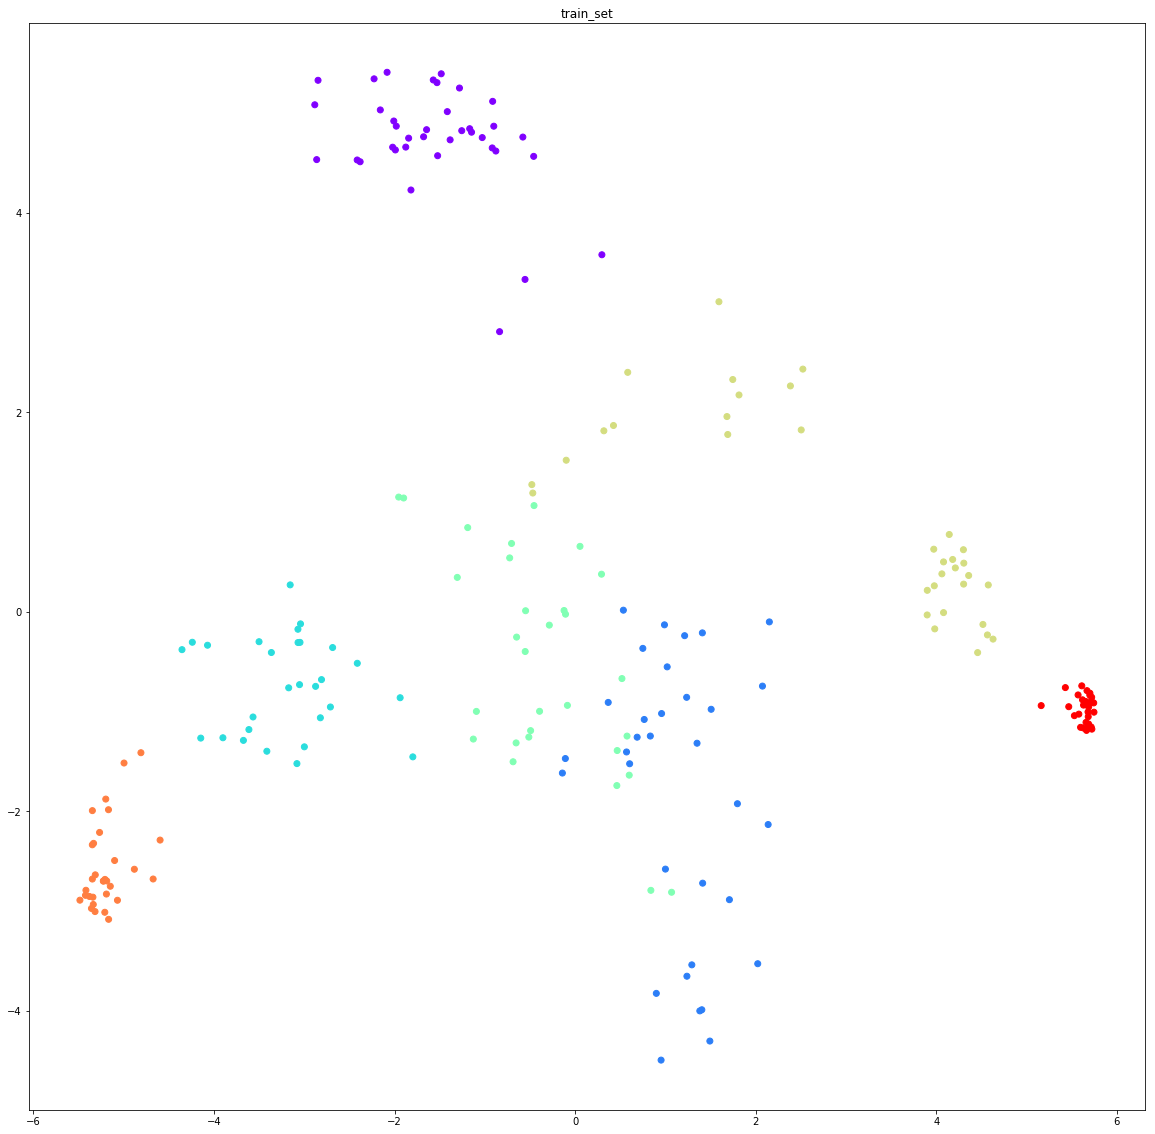

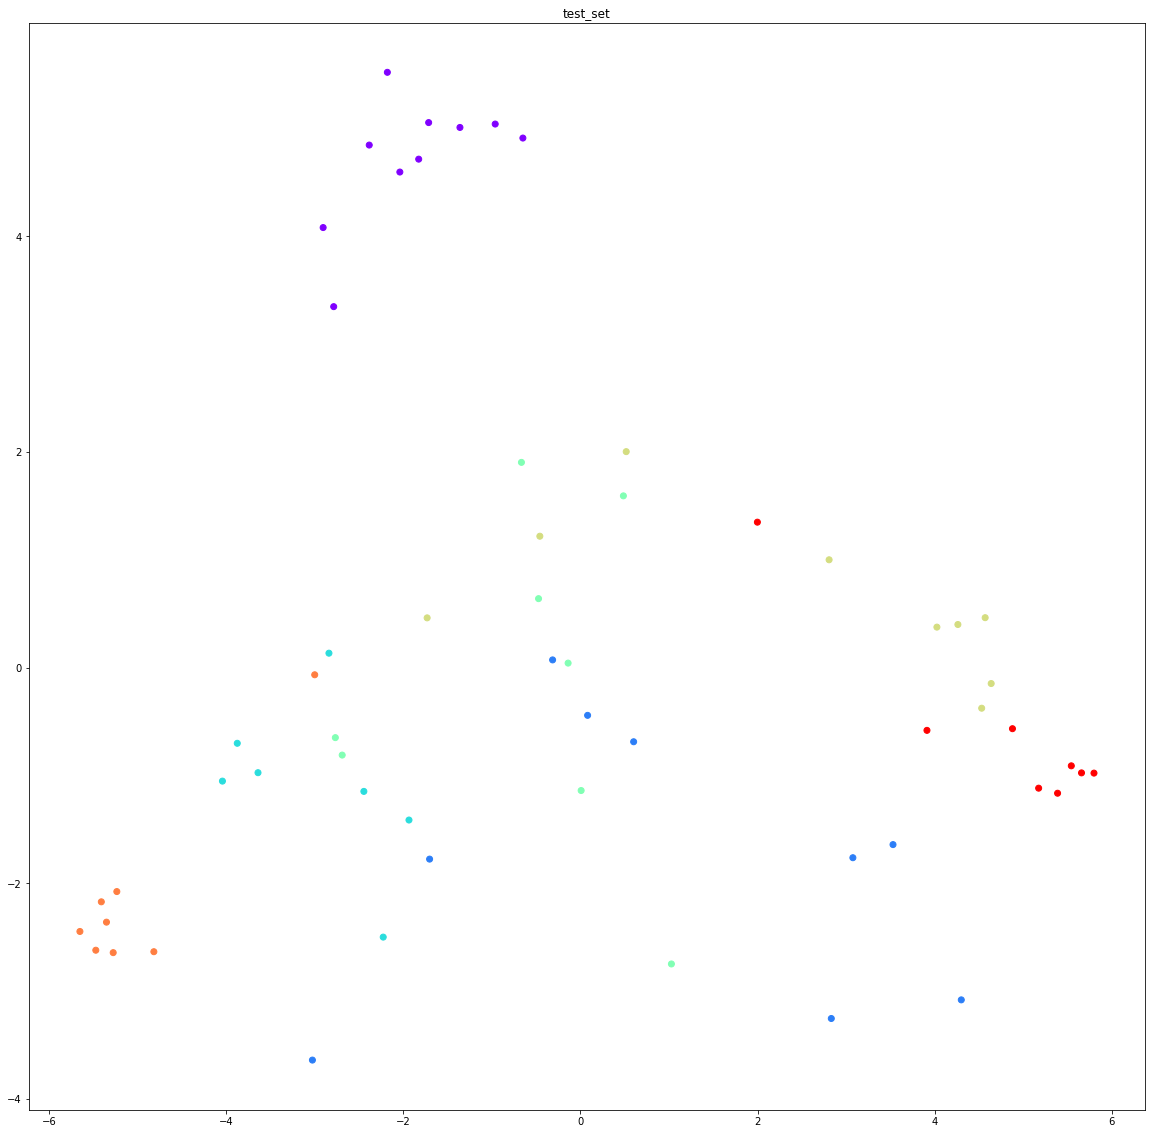

In [61]:
utilities.plot_pca(batch_sampler, cls)